<h1>Python: Data Exploration</h1>

<h1>QUES: What are the main characteristics which have the most impact on the car price?</h1>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [6]:
df=pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [8]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [9]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [10]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [11]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [12]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [13]:
# examining engine-location as a good predictor variable for the price of cars
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [14]:
# conclusion: since we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. 
# Thus, we cannot draw any conclusions about the engine location.

In [20]:
# grouping the variable "drive-wheels"
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
# There are 3 different categories of drive wheels - rwd, fwd & 4wd 

In [25]:
# Ques: Is there any relationship between the different types of "drive system" and the "price" of vehicles?
# If True, which types of "drive system" adds the most value to the vehicle?

In [26]:
# Finding the relationships between multiple variables and grouping their results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [28]:
# Making the grouped data into a pivot table for better visualization
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
# Filling missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

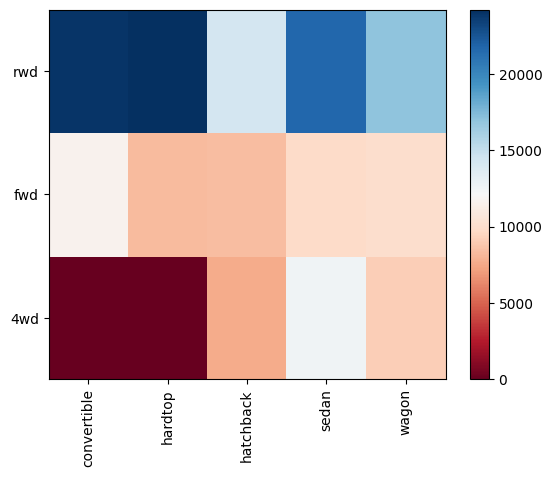

In [32]:
# visualizing the relationship between Body Style vs Price using heat map chart
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [44]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient of wheel vs price is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient of horsepower vs price is", pearson_coef, " with a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient of length vs price is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient of width vs price is", pearson_coef, " with a P-value of P =", p_value )

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient of curb-weight vs price is", pearson_coef, " with a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient of engine-size vs price is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient of bore vs price is", pearson_coef, " with a P-value of P =  ", p_value )

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient of city-mpg vs price is", pearson_coef, " with a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient of highway-mpg vs price is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient of wheel vs price is 0.584641822265508  with a P-value of P = 8.076488270732947e-20
The Pearson Correlation Coefficient of horsepower vs price is 0.8095745670036559  with a P-value of P =  6.369057428259526e-48
The Pearson Correlation Coefficient of length vs price is 0.6906283804483638  with a P-value of P =  8.016477466159709e-30
The Pearson Correlation Coefficient of width vs price is 0.7512653440522672  with a P-value of P = 9.200335510482065e-38
The Pearson Correlation Coefficient of curb-weight vs price is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53
The Pearson Correlation Coefficient of engine-size vs price is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64
The Pearson Correlation Coefficient of bore vs price is 0.5431553832626603  with a P-value of P =   8.04918948393533e-17
The Pearson Correlation Coefficient of city-mpg vs price is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29
The Pea